In [4]:
#import matplotlib
import matplotlib.pyplot as mp
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import numpy as np
import metpy.calc as mpc
import xarray as xr
import pandas as pd
import datetime as dt
#from scam_func import *


In [99]:
#### SCRIPT TO READ IN SCAM OUTPUT AND MAKE SOME PLOTS ####
###### IOP file info. ######
#scam_file_in = './FSCAM.T42_T42.SAS.001.cam.h0.2013-06-10-43200.nc'   # input template (default: 20min tstep)
#scam_file_in = './FSCAM.T42_T42.SAS.002.cam.h0.2013-06-10-43200.nc'   # input template (5min tstep)
#scam_file_in = './FSCAM.T42_T42.SAS.003.cam.h0.2013-06-10-43200.nc'   # input template (1min tstep)
#scam_file_in = './FSCAM.T42_T42.SAS.007.cam.h0.2013-06-10-43200.nc'   # input template, fixed q for SCAM (double,kg/kg), shflx/lhflx prescribed (default: 20min tstep)
#scam_file_in = './FSCAM.T42_T42.SAS.008.cam.h0.2013-06-10-43200.nc'   # as 007, but with omega,divT and divq set to zero.
#scam_file_in = './FSCAM.T42_T42.SAS.011b.cam.h0.2013-06-10-43200.nc'   # as 007, but with omega,divT and divq set to zero.


scam_file_num = '012a'  # For detailed single case analysis
scam_file_nums = [11,12,13,14]  # For comparisons

scam_file_pre = "FSCAM.T42_T42.SAS."
scam_file_suf = ".cam.h0.2013-06-10-43200.nc"

zoffset = 6.


#### PLOTTING ####

pvars_ts1d = np.array(['TS','PBLH','LHFLX','SHFLX','PRECC','PRECL','FLNS','CAPE']) # D profile timeseries plots
pvars_ts2d = ['T','Q','RELHUM','CLOUD','ZMDQ','ZMDT','STEND_CLUBB','RVMTEND_CLUBB'] # 2D profile timeseries plots
pvars_snap = ['T','Q','TH','THL']  # Snapshot plotting vars
pvars_anim = np.array(('T','RELHUM'))

tsnaps = np.array([6.,8.,10.,12.,14.,16])     # Time of snapshots (local time)

####### GRAPHICS ########
#mp.interactive(True)
#%matplotlib qt
%matplotlib inline



#### CONSTANTS #####

r_gas = 287.   # Specific gas constant for dry air
cp_air = 1004.6 # Specific heat for dry air
Lv = 2.501e6      # Latent heat of vaporization

r_cp = r_gas/cp_air    # r/cp
grav = 9.81     # Gravity ave.
p0 = 100000. # pref 

###### DERIVED VARS #######
scam_files_in = [ scam_file_pre+("{:0>3d}".format(x))+scam_file_suf for x in scam_file_nums]
scam_file_in = scam_file_pre+scam_file_num+scam_file_suf 

print('Reading in data from file = '+scam_file_in)

scam_in = xr.open_dataset(scam_file_in,engine='netcdf4')
xr.set_options(keep_attrs=True)

## Dimensions

time = scam_in.time
hour_frac = time.time.dt.hour+time.time.dt.minute/60.-zoffset
vplevs = scam_in['lev'].transpose()
ntsnaps = tsnaps.size

## Vertical range to plot

pptop = 100.
ipplevs = np.where(vplevs>=pptop) ; ip0 = np.min(ipplevs) ; ip1 = np.max(ipplevs)
vplevs_v = vplevs[ip0:ip1]
print("hi1")

Reading in data from file = FSCAM.T42_T42.SAS.012a.cam.h0.2013-06-10-43200.nc
hi1


------ Animations ------>>>   T  ---  Temperature  -- min/max -->  177.70714 320.9985
------ Animations ------>>>   RELHUM  ---  Relative humidity  -- min/max -->  4.9903655e-09 101.781136
[]


/Users/rneale/miniconda3/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:215: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


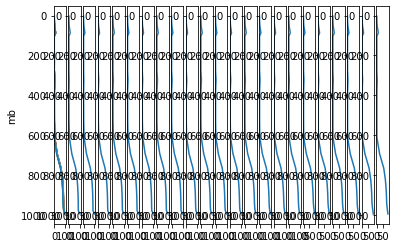

In [108]:
###### Plotting ##########

#plot1d_ts_scam()   # 1D time series plots
#plot2d_ts_scam()   # 2D time series plots
#plot1d_snap_scam()   # 1D snapshot plots
plot1d_anim_scam()   # 2D animation  plots


In [66]:
#fig = mp.figure()
#ax = mp.axes(xlim=(0, 4), ylim=(-2, 2))
#line, = ax.plot([], [], lw=3)

#def init():
#    line.set_data([], [])
#    return line,
#def animate(i):
#    x = np.linspace(0, 4, 1000)
#    y = np.sin(2 * np.pi * (x - 0.01 * i))
#    line.set_data(x, y)
#    return line,

#anim = FuncAnimation(fig, animate, init_func=init,
##                               frames=100, interval=40, blit=True)
#HTML(anim.to_html5_video())


#mp.show()

#fig.show()
#anim.save('sine_wave.gif', writer='imagemagick')


hi


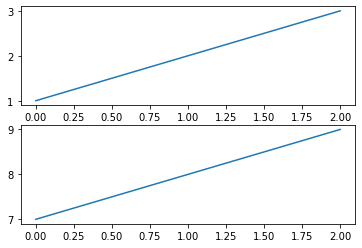

In [8]:




print("hi")
fig = mp.figure()
ax = fig.add_subplot(111)
ax.plot([1,2,3])

    # now later you get a new subplot; change the geometry of the existing
nplots = 2

for ip in range(nplots-1):
    n = len(fig.axes)
    for i in range(n):
        fig.axes[i].change_geometry(n+1, 1, i+1)
    ax = fig.add_subplot(n+1, 1, n+1)
    ax.plot([7,8,9]) 
        
    # add the new
#ax = fig.add_subplot(n+1, 1, n+1)
#ax.plot([4,5,6])

#n = len(fig.axes)
#for i in range(n):
#    fig.axes[i].change_geometry(n+1, 1, i+1)


#n = len(fig.axes)
#ax = fig.add_subplot(n+1, 1, n+1)
#ax.plot([7,8,9])

mp.show()




In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"

In [107]:
#########################
#   1D Time plotting    #
#########################
## Plot Variables ##


def plot1d_ts_scam():

    plot1d_dic = {}

    plot1d_dic['LHFLX']  = [1.,0.,300]
    plot1d_dic['SHFLX']  = [1.,0., 300]
    plot1d_dic['TS']     = [1., 290., 300.]
    plot1d_dic['PBLH']   = [1., 0., 1000.]
    plot1d_dic['PRECL']  = [86400.*1000., 0., 10.]
    plot1d_dic['PRECC']  = [86400.*1000., 0., 10.]
    plot1d_dic['FLNS']   = [1., 200., 800.]
    plot1d_dic['CAPE']   = [1., 0., 800.]

    plot1d_df = pd.DataFrame(plot1d_dic,index=['vscale','cmin','cmax'])
    plot1d_df


## 1D PLOTS ##
#mp.rcParams['figure.dpi'] = 50

    for var in pvars_ts1d:
 
        vscale = plot1d_dic[var][0] ; cmin = plot1d_dic[var][1] ; cmax = plot1d_dic[var][2]
    
        with xr.set_options(keep_attrs=True): 
            pvar = vscale*scam_in[var].isel(lat=0,lon=0)

        
        # Fig. setup
        print('---- PLOTTING 1D TIME PLOTS ------>>>  ',pvar.attrs['long_name'],' --amin/cmax --> ',  np.min(pvar.values),np.max(pvar.values))
    
        # Plot
        mp.plot(hour_frac,pvar)
  
    
    # Axes stuff
        mp.xlabel("Local Time (hr)")
        mp.ylabel(pvar.attrs['units'])
        mp.title(pvar.attrs['long_name'])
        mp.show()

        
        
        
        
        
        
        
        
        
        
        
        
        
##########################################
# 2D Time/Height Timeseries Plotting info.
##########################################


def plot2d_ts_scam():

    plot2d_dic = {}

    plot2d_dic['T']      = [1.,190.,330.]
    plot2d_dic['RELHUM'] = [1.,10., 120.]
    plot2d_dic['CLOUD']  = [100., 0., 100.]
    plot2d_dic['Q']      = [1000., 1., 20.]
    plot2d_dic['WPRTP_CLUBB'] = [1., 0., 200.]
    plot2d_dic['WPTHLP_CLUBB'] = [1., 0., 200.]
    plot2d_dic['WP3_CLUBB']      = [1., -1., 1.]
    plot2d_dic['STEND_CLUBB']    = [1., -.5, 0.55]
    plot2d_dic['RVMTEND_CLUBB']  = [1000.*86400, -30., 30.]
    plot2d_dic['DCQ']  = [1000., -5., 5.]
    plot2d_dic['THL']  = [1., 210, 310.]
    plot2d_dic['ZMDT']  = [86400., -5., 5.]
    plot2d_dic['ZMDQ']  = [86400.*1000., -5., 5.]

    plot2d_df = pd.DataFrame(plot2d_dic,index=['vscale','cmin','cmax'])
    plot2d_df

    nclevs = 20 # Number of contour levels


## TIME/HEIGHT PLOTTING ##
    mp.rcParams['figure.dpi'] = 70

    for var in pvars_ts2d:

        vscale = plot2d_dic[var][0] ; cmin = plot2d_dic[var][1] ; cmax = plot2d_dic[var][2]

        pvar = scam_in[var].isel(lat=0,lon=0).transpose()  

        print('---- PLOTTING 2D TIME/HEIGHT PLOTS------>>>  ',pvar.attrs['long_name'],' -- cmin/cmax --> ',  np.min(pvar.values),np.max(pvar.values))
        plevels = np.arange(cmin,cmax,(cmax-cmin)/nclevs)

        fig,ax = mp.subplots()

        p_tp = ax.contour(hour_frac,scam_in[pvar.dims[0]],vscale*pvar,levels=plevels)
        ax.invert_yaxis()
        mp.clabel(p_tp, fontsize=9, inline=1,fmt='%1.0f')
        mp.hlines(scam_in[pvar.dims[0]], min(hour_frac), max(hour_frac), linestyle="dotted",lw=0.04)
        ax.set_xlabel("Local Time (hr)")
        ax.set_ylabel("Pressure (mb)")
        ax.set_title(var+" - "+pvar.attrs['long_name']+" ("+pvar.attrs['units']+")")

        mp.show()
        
        del pvar       
        
        
        
        
        
        
        
##########################################
# 2D Snapshot/Height Timeseries Plotting info.
##########################################


def plot1d_snap_scam():
              
    for var in pvars_snap:

        pvar = None

        if var =='TH': pvar = scam_in['T'].isel(lat=0,lon=0)*(0.01*p0/vplevs)**r_cp ; pvar.attrs['long_name'] = "Potential Temperature" ; pvar.attrs['units'] = "K" ; theta = pvar
        if var =='THL': pvar = theta-(theta/scam_in['T'].isel(lat=0,lon=0))*(Lv/cp_air)*scam_in['Q'].isel(lat=0,lon=0) ; pvar.attrs['long_name'] = "Liq. Water Potential Temperature"

        if pvar is None :  # Set pvar if not already.
            pvar = scam_in[var].isel(lat=0,lon=0)

        print('------ SNAPSHOTS ------>>>  ',var,' --- ',pvar.attrs['long_name'],' -- min/max --> ',  np.min(pvar.values),np.max(pvar.values))

        # Plot several different functions...

        labelspacing = []
        labels = []

        ## Loop Snapshot Times ##

        for ii in range(0, ntsnaps): 
            itt = np.min(np.where(hour_frac==tsnaps[ii]))
            pvar_v = pvar[itt,ip0:ip1]
            mp.plot(pvar_v,vplevs_v)

    #        if var not in ['T','TH','THL']: mp.vlines(0, 0, scam_in[pvar.dims[1]].max(), linestyle="dashed",lw=1)
            mp.hlines(vplevs_v, min(pvar_v), max(pvar_v), linestyle="dotted",lw=0.04)

    ######### END of snapshot loop #########

    # Legend
        mp.title(pvar.attrs['long_name']+' ('+pvar.attrs['units']+')')
        mp.legend(labels=tsnaps, ncol=2, loc="center right", 
                columnspacing=1.0, labelspacing=1, 
                handletextpad=0.5, handlelength=0.5, frameon=False)
        print(pvar.attrs['units'])
        mp.gca().invert_yaxis()
        mp.show()
        del pvar       

        
        
        
        
        
        
        
def plot1d_anim_scam():
    
    nanim_vars = pvars_anim.size
    
#    fig, ax = mp.subplots(nrows=1, ncols=nanim_vars,figsize=(15, 5)))
   
    
# 
    def init():
        line.set_data([], [])
        return line,
#    def animate(i):
#        x = np.linspace(0, 4, 1000)
#        y = np.sin(2 * np.pi * (x - 0.01 * i))
#        line.set_data(x, y)
#        return line,

#    line, = ax.plot(x, np.sin(x))
          
    for var in pvars_anim:

        pvar = None

        if var =='TH': pvar = scam_in['T'].isel(lat=0,lon=0)*(0.01*p0/vplevs)**r_cp ; pvar.attrs['long_name'] = "Potential Temperature" ; pvar.attrs['units'] = "K" ; theta = pvar
        if var =='THL': pvar = theta-(theta/scam_in['T'].isel(lat=0,lon=0))*(Lv/cp_air)*scam_in['Q'].isel(lat=0,lon=0) ; pvar.attrs['long_name'] = "Liq. Water Potential Temperature"

        if pvar is None :  # Set pvar if not already.
            pvar = scam_in[var].isel(lat=0,lon=0)

        print('------ Animations ------>>>  ',var,' --- ',pvar.attrs['long_name'],' -- min/max --> ',  np.min(pvar.values),np.max(pvar.values))

    # Dynamically allocate subplots and animate Animate

#    ax.plot(pvar[0,:],vplevs) ;  ax.invert_yaxis()
    
  
    fig = mp.figure()
    
    def animate(ii):
       
        ax = fig.add_subplot(111)
        
        ax.set_ylabel('mb') 
        ax.plot(pvar[ii,:],vplevs) ;  ax.invert_yaxis()
        for ip in range(1,3):
            n = len(fig.axes)
            for i in range(n):
                fig.axes[i].change_geometry(1, n+1, i+1)
            ax = fig.add_subplot(1, n+1, n+1)
            ax.plot(pvar[ii,:],vplevs) ;  ax.invert_yaxis()
        
#        mp.show()

    print(fig.axes)

    animate(0)
#    animate(200)
        
#
#       def init():
#        line.set_data([], [])
#        return line,     
    
#       def animate(i):
#        x = np.linspace(0, 4, 1000)
#        y = np.sin(2 * np.pi * (x - 0.01 * i))
#        line.set_data(x, y)
#        return line, 
#        for ip in range(pvars_anim.size-1):
#            n = len(fig.axes)
#            for i in range(n):
#                fig.axes[i].change_geometry(1, n+1, i+1)
#            ax = fig.add_subplot(1, n+1, n+1)
#            ax.plot(pvar[0,:],vplevs) ;  ax.invert_yaxis()
        
        
    anim = FuncAnimation(fig, animate, np.arange(1,10))
#    mp.show()
#    plt.show()
    HTML(anim.to_html5_video())

    del pvar
    
   
